# Model Building - Vehicles Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_clean = pd.read_csv('vehicles_clean.csv')

df_clean.drop(['Unnamed: 0',], axis =1, inplace = True)

In [3]:
df_num = df_clean[['price','year','odometer','edad','millas_anuales','dlen','cylinders']]
df_cat = df_clean[['manufacturer','model','fuel','transmission','drive','type','state','condition']]

In [4]:
df_clean.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'description',
       'state', 'dlen', 'edad', 'millas_anuales', 'precio_por_milla'],
      dtype='object')

In [5]:
df_model = df_clean[['edad','manufacturer','fuel','odometer','transmission','type','millas_anuales', 'dlen', 'condition',
                     'price','cylinders','drive']]

**Multiple Regression**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
#Adding constant for our stats model librarie
df_model = sm.tools.tools.add_constant(df_model, prepend=True, has_constant='skip')

In [8]:
#First, were gonna try our regression only with numerical variables
X1 = df_model[['const','odometer','edad','millas_anuales','dlen','cylinders']]
y1 = df_model.price.values

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [10]:
reg_sm1 = sm.OLS(y_train1, X_train1).fit()
reg_sm1.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 3.418e+04
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:00:09   Log-Likelihood:            -1.4025e+06
No. Observations:              135738   AIC:                         2.805e+06
Df Residuals:                  135732   BIC:                         2.805e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.084e+04    115.887     93.546      0.000    1.06e+04    1.11e+04
odometer          -0.0424      0.001    -56.007      0.000      -0.044      -0.041
edad           -1122.0520      8.521   -131.687      0.000   -1138.752   -1105.352
millas_anuales     0.0141      0.006      2.393      0.017       0.003       0.026
dlen               0.3740      0.007     53.993      0.000       0.360       0.388
cylinders       3076.7673     15.617    197.018      0.000    3046.159    3107.376
==============================================================================
Omnibus:                    29466.413   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69238.250
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       5.502   Cond. No.                     6.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Got an R of 56%. The variable millas_anuales had an igsignificant value for our model.
#The constant means that we start from there to predict the price of the vehicle.

In [64]:
y_hat1 = reg_sm1.predict(X_test1)
rmse1 = math.sqrt(mean_squared_error(y_hat1, y_test1))
mae1 = mean_absolute_error(y_hat1, y_test1)
r21 = 0.557

print(rmse1)
print(mae1)
print(r21)

7451.000886724094
5465.969867383569
0.557


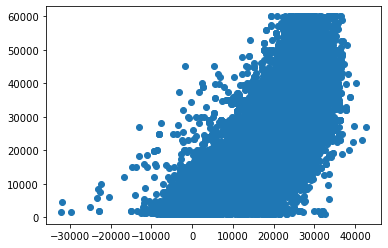

In [20]:
plt.scatter(y_hat1,y_test1)

In [19]:
#Not bad results for the first model.

In [21]:
#Now were gonna add some categorical variables tom our model, apply dummies to make it useful to our model
X2 = pd.get_dummies(df_model[['odometer','edad','fuel','transmission','type','dlen','condition','drive','cylinders']])                              
y2 = df_model.price.values

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [23]:
reg_sm2 = sm.OLS(y_train2, X_train2).fit()
reg_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:08:23   Log-Likelihood:            -1.3772e+06
No. Observations:              135738   AIC:                         2.755e+06
Df Residuals:                  135708   BIC:                         2.755e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
odometer                    -0.0477      0.000   -133.845      0.000      -0.048      -0.047
edad                     -1040.7759      4.647   -223.949      0.000   -1049.885   -1031.667
dlen                         0.2832      0.006     46.687      0.000       0.271       0.295
cylinders                 1444.9690     15.861     91.103      0.000    1413.882    1476.056
fuel_diesel               1.052e+04    100.835    104.322      0.000    1.03e+04    1.07e+04
fuel_electric             5124.2231    274.134     18.692      0.000    4586.925    5661.521
fuel_gas                  1937.9784     82.045     23.621      0.000    1777.172    2098.785
fuel_hybrid               2961.2188    137.198     21.584      0.000    2692.313    3230.124
transmission_automatic    9387.3552     77.701    120.814      0.000    9235.063    9539.647
transmission_manual       1.116e+04     88.864    125.533      0.000     1.1e+04    1.13e+04
type_NoEspecificado        -43.6840     73.301     -0.596      0.551    -187.353      99.985
type_SUV                  -689.5973     71.190     -9.687      0.000    -829.128    -550.067
type_bus                  7503.2210    549.908     13.644      0.000    6425.411    8581.031
type_convertible          3360.6759    144.465     23.263      0.000    3077.527    3643.825
type_coupe                2020.4485    106.828     18.913      0.000    1811.067    2229.830
type_hatchback           -2430.0711    106.723    -22.770      0.000   -2639.247   -2220.896
type_mini-van             -145.9285    127.342     -1.146      0.252    -395.516     103.659
type_offroad              6772.9749    490.782     13.800      0.000    5811.051    7734.899
type_pickup               4057.0921     88.339     45.927      0.000    3883.950    4230.234
type_sedan               -1859.5142     71.169    -26.128      0.000   -1999.004   -1720.024
type_truck                4467.3096     86.329     51.747      0.000    4298.106    4636.514
type_van                  -180.8497    115.859     -1.561      0.119    -407.931      46.232
type_wagon               -2289.2940    106.238    -21.549      0.000   -2497.518   -2081.070
condition_NoEspecificado  4128.3276     91.226     45.254      0.000    3949.526    4307.129
condition_excellent       2742.4361     90.817     30.197      0.000    2564.436    2920.436
condition_fair            2000.9744    151.047     13.247      0.000    1704.926    2297.023
condition_good            2480.3249     93.545     26.515      0.000    2296.979    2663.671
condition_like new        3575.3604    103.922     34.404      0.000    3371.676    3779.045
condition_new             6543.6970    287.915     22.728      0.000    5979.389    7108.005
condition_salvage         -928.3373    500.975     -1.853      0.064   -1910.238      53.564
drive_4wd     

In [24]:
#R of 70%! not bad. Variables:  type_NoEspecificado	, type_mini-van and type_van are useful no our model.

In [65]:
y_hat2 = reg_sm2.predict(X_test2)                                      
rmse2 = math.sqrt(mean_squared_error(y_hat2, y_test2)) 
mae2 = mean_absolute_error(y_hat2, y_test2)
r22 = 0.695

print(rmse2)
print(mae2)
print(r22)

6197.098041245167
4518.36409832375
0.695


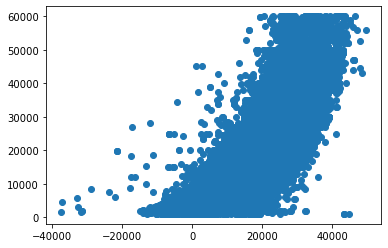

In [29]:
plt.scatter(y_hat2,y_test2)

In [28]:
#RMSE improve aprox in 1.3k from our first. Very good.

In [30]:
#Lets try some cross validation to see how our model behaves in real world data

In [31]:
from sklearn.model_selection import cross_val_score 
X3 = pd.get_dummies(df_model[['odometer','edad','fuel','transmission','type','dlen','condition','drive','cylinders']])
y3 = df_model.price.values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [32]:
reg3 = LinearRegression().fit(X_train3, y_train3)
reg3.score(X_train3,y_train3)

scores = cross_val_score(reg3,X3,y3, cv=5, scoring = 'neg_mean_absolute_error')
(np.abs(scores)).mean()

4515.49837259632

In [33]:
#Confirms our model with a mae around 4.5k and an R of 70%.

In [34]:
#Time to prove our second model: KNN Regression

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler

In [37]:
Xknn = pd.get_dummies(df_model[['odometer','edad','fuel','transmission','type','dlen','condition','drive','cylinders']])
yknn = df_model.price.values

In [39]:
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn, yknn, test_size=0.3, random_state=0)

In [40]:
#First we have to reshape our independent variables
scaler = MinMaxScaler(feature_range=(0, 1))
Xknn_train_scaled = scaler.fit_transform(Xknn_train)
Xknn_train = pd.DataFrame(Xknn_train_scaled)

In [42]:
rmse_val2 = [] 
for K in range(10):
    K += 1
    modelknn = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelknn.fit(Xknn_train, yknn_train)
    predknn=modelknn.predict(Xknn_test) 
    errorknn = sqrt(mean_squared_error(yknn_test, predknn)) #calculamos rmse
    rmse_val2.append(errorknn) #guardamos los valores rmse
    print('RMSE value for k= ' , K , 'is:', errorknn)

RMSE value for k=  1 is: 11362.214036792791
RMSE value for k=  2 is: 11350.745817969368
RMSE value for k=  3 is: 11157.6121353308
RMSE value for k=  4 is: 11569.246549296844
RMSE value for k=  5 is: 11974.941807526095
RMSE value for k=  6 is: 11592.535741596796
RMSE value for k=  7 is: 11880.736458722778
RMSE value for k=  8 is: 12227.273458578713
RMSE value for k=  9 is: 12250.11903300435
RMSE value for k=  10 is: 12373.77770092846


In [43]:
# The best value for our model KNN is when K = 3. Anyways is worst than our two first models.
# Lets check the MAE for K = 3.

In [45]:
mae_val2 = [] 
for K in range(3):
    K += 1
    modelknn2 = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelknn2.fit(Xknn_train, yknn_train)
    predknn2=modelknn2.predict(Xknn_test) 
    errorknn2 = mean_absolute_error(yknn_test, predknn2) #calculamos mae
    mae_val2.append(errorknn) #guardamos los valores mae
    print('MAE value for k= ' , K , 'is:', errorknn2)

MAE value for k=  1 is: 9283.417712380102
MAE value for k=  2 is: 9281.445396568914
MAE value for k=  3 is: 8332.87014817616


In [47]:
#So we have an RMSE and MAE highest than our two first models. Anyways lets save them to analysis.
rmseknn = 11157.6121353308
maeknn = 8332.87014817616

In [48]:
#Time for our third model: RandomForest
#I believe this will show us better results

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [51]:
Xr = pd.get_dummies(df_model[['odometer','edad','fuel','transmission','type','dlen','condition','drive','cylinders']])
yr = df_model.price.values

In [52]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.3, random_state=0)
modelor = RandomForestRegressor(random_state=1)
modelor.fit(Xr_train, yr_train)
pred = modelor.predict(Xr_test)

In [60]:
rmser = sqrt(mean_squared_error(yr_test, pred)) 
maer = mae(yr_test, pred)
r2r = r2_score(yr_test, pred)

print(rmser)
print(maer)
print(r2_score(yr_test, pred))

3753.834766855475
2148.1983567091916
0.8875779916162655


In [55]:
#By far the best model, but we have an R of 89%. Maybe we have an overfitting problem :(

In [56]:
#Showing the variable importance
CoeffRM1 = pd.DataFrame(columns=["Variable","Importancia"])
CoeffRM1["Variable"]= Xr.columns
CoeffRM1["Importancia"]= modelor.feature_importances_
CoeffRM1.sort_values("Importancia", ascending = False)

,Variable,Importancia
1,edad,0.435816
0,odometer,0.141492
32,drive_fwd,0.100263
2,dlen,0.084672
3,cylinders,0.076381
4,fuel_diesel,0.039876
30,drive_4wd,0.035904
20,type_truck,0.008865
6,fuel_gas,0.008694
18,type_pickup,0.008056


In [57]:
#Maybe we can try do decrease the overfitting, by tuning some parameters.

In [58]:
modelor2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
modelor2.fit(Xr_train, yr_train)
pred2 = modelor2.predict(Xr_test)

In [61]:
rmser2 = sqrt(mean_squared_error(yr_test, pred2))
maer2 = mae(yr_test, pred2)
r2r2 = r2_score(yr_test, pred2)

print(rmser2)
print(maer2)
print(r2_score(yr_test, pred2))

3991.1535201273828
2479.3486776963787
0.8729139441268144


In [62]:
# RMSE ~ 0.2 higher than our firt RF model, and R = 87%. Its nice.
# Maybe our model its still overfitted, in the next update, we can try some GridSearchCV to tunning the parameters

In [85]:
# Finally lets compare all models

models = [['Multiple regression 1', mae1, rmse1, r21], ['Multiple regression 2', mae2, rmse2, r22],
         ['KNN Regression', maeknn, rmseknn, '-'], ['RandomForest1', maer, rmser, r2r], ['RamdonForest2', maer2, rmser2, r2r2]]

df_models = pd.DataFrame (models, columns = ['Model','MAE', 'RMSE','R2'])
df_models = df_models.round(2)

df_models

,Model,MAE,RMSE,R2
0,Multiple regression 1,5465.97,7451.00,0.557
1,Multiple regression 2,4518.36,6197.10,0.695
2,KNN Regression,8332.87,11157.61,-
3,RandomForest1,2148.20,3753.83,0.887578
4,RamdonForest2,2479.35,3991.15,0.872914


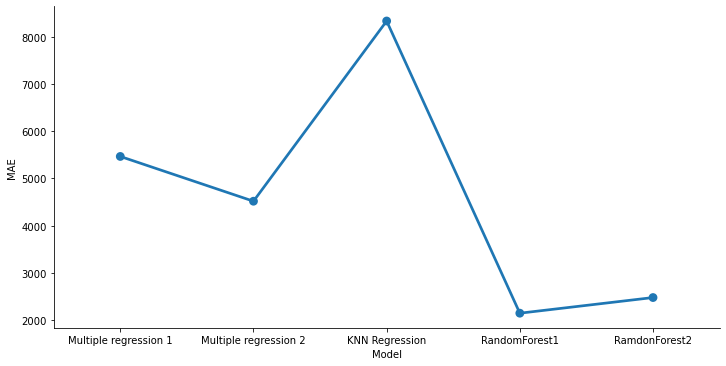

In [78]:
# Lets visualize the MAE per model
sns.catplot(x="Model", y="MAE", linestyles=["-"], kind="point", data=df_models, aspect = 2)

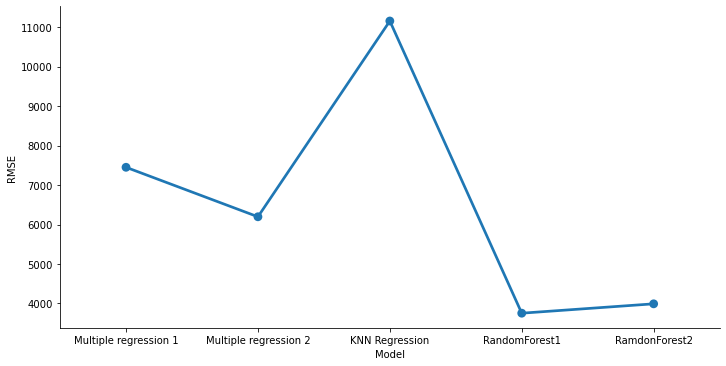

In [79]:
# Lets visualize the RMSE per model
sns.catplot(x="Model", y="RMSE", linestyles=["-"], kind="point", data=df_models, aspect = 2)

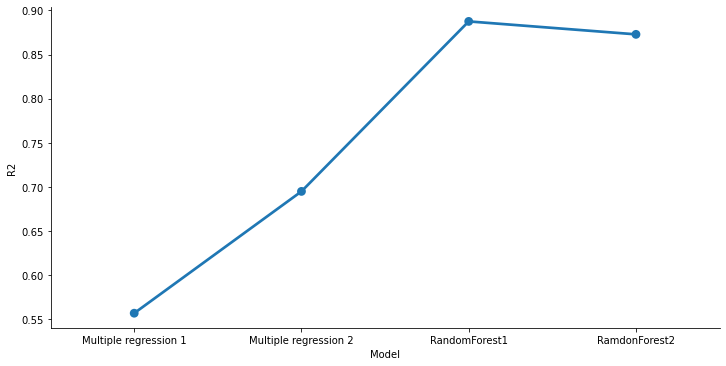

In [89]:
# Lets visualize the R2 per model
df_r2 = df_models[df_models["Model"]!='KNN Regression']
sns.catplot(x="Model", y="R2", linestyles=["-"], kind="point", data=df_r2, aspect = 2)